In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize

In [40]:
df = pd.read_excel(r'../1_Data/sthlm_weather_1900-2020.xlsx') # From: http://miljobarometern.stockholm.se/klimat/klimat-och-vaderstatistik/manadsmedeltemperatur/

In [41]:
df.head(3)

,Name,Sign,Measure area,Date,Year,Value
0,Månadsmedeltemperatur,TEMA.1.2.12,Januari,1900-12-31,1900,-2.7
1,Månadsmedeltemperatur,TEMA.1.2.12,Januari,1901-12-31,1901,-3.1
2,Månadsmedeltemperatur,TEMA.1.2.12,Januari,1902-12-31,1902,-1.1


In [44]:
df = df.rename(columns={"Measure area": "Month", "Value": "Mean Temperature"})

df_piv = df.pivot(index="Month", columns="Year", values="Mean Temperature").reindex(["Januari", 
                                                                                     "Februari",
                                                                                     "Mars",
                                                                                     "April",
                                                                                     "Maj", 
                                                                                     "Juni",
                                                                                     "Juli",
                                                                                     "Augusti",
                                                                                     "September",
                                                                                     "Oktober",
                                                                                     "November",
                                                                                     "December"])

df_piv

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,,,,,,,
Januari,-2.7,-3.1,-1.1,-3.1,-0.1,-3.1,-0.7,-3.7,-2.0,-1.2,...,-1.9,-1.0,-3.3,-1.5,0.9,-4.2,-0.3,0.2,-1.7,4.0
Februari,-7.1,-6.2,-4.5,1.0,-4.6,-1.2,-0.9,-2.7,-1.3,-4.9,...,-4.2,-2.8,-1.3,2.3,1.3,0.5,0.2,-3.2,1.9,2.9
Mars,-2.4,-1.5,-2.3,3.9,-1.8,0.5,-1.7,0.4,-1.8,-2.0,...,1.2,4.4,-2.3,4.5,3.9,3.2,3.3,-1.6,2.7,3.6
April,3.2,4.5,0.9,3.2,4.0,2.0,5.4,2.5,2.8,1.5,...,9.2,4.9,4.9,7.4,7.4,6.2,5.0,7.1,7.4,7.1
Maj,7.6,10.8,6.5,9.9,7.6,10.1,11.1,7.7,8.2,5.7,...,11.9,12.2,13.1,11.1,10.2,13.1,11.3,16.0,10.9,9.9
Juni,15.3,15.8,12.0,14.1,12.7,17.0,14.5,13.1,13.8,13.5,...,17.4,13.7,16.5,14.2,14.5,16.5,15.2,17.2,18.4,18.5
Juli,17.1,21.2,13.7,16.5,15.8,16.9,17.5,14.9,16.1,15.4,...,19.4,17.8,18.4,20.7,17.0,18.9,17.4,22.4,17.7,16.9
Augusti,16.6,18.1,13.4,14.4,14.8,14.6,14.8,12.9,15.6,15.2,...,17.4,16.8,17.8,17.5,18.2,16.8,17.0,19.3,17.9,19.1
September,11.5,13.0,9.7,12.3,11.4,11.2,10.8,10.8,10.7,10.9,...,14.0,12.2,13.0,13.6,13.5,15.3,13.1,14.3,13.2,14.1


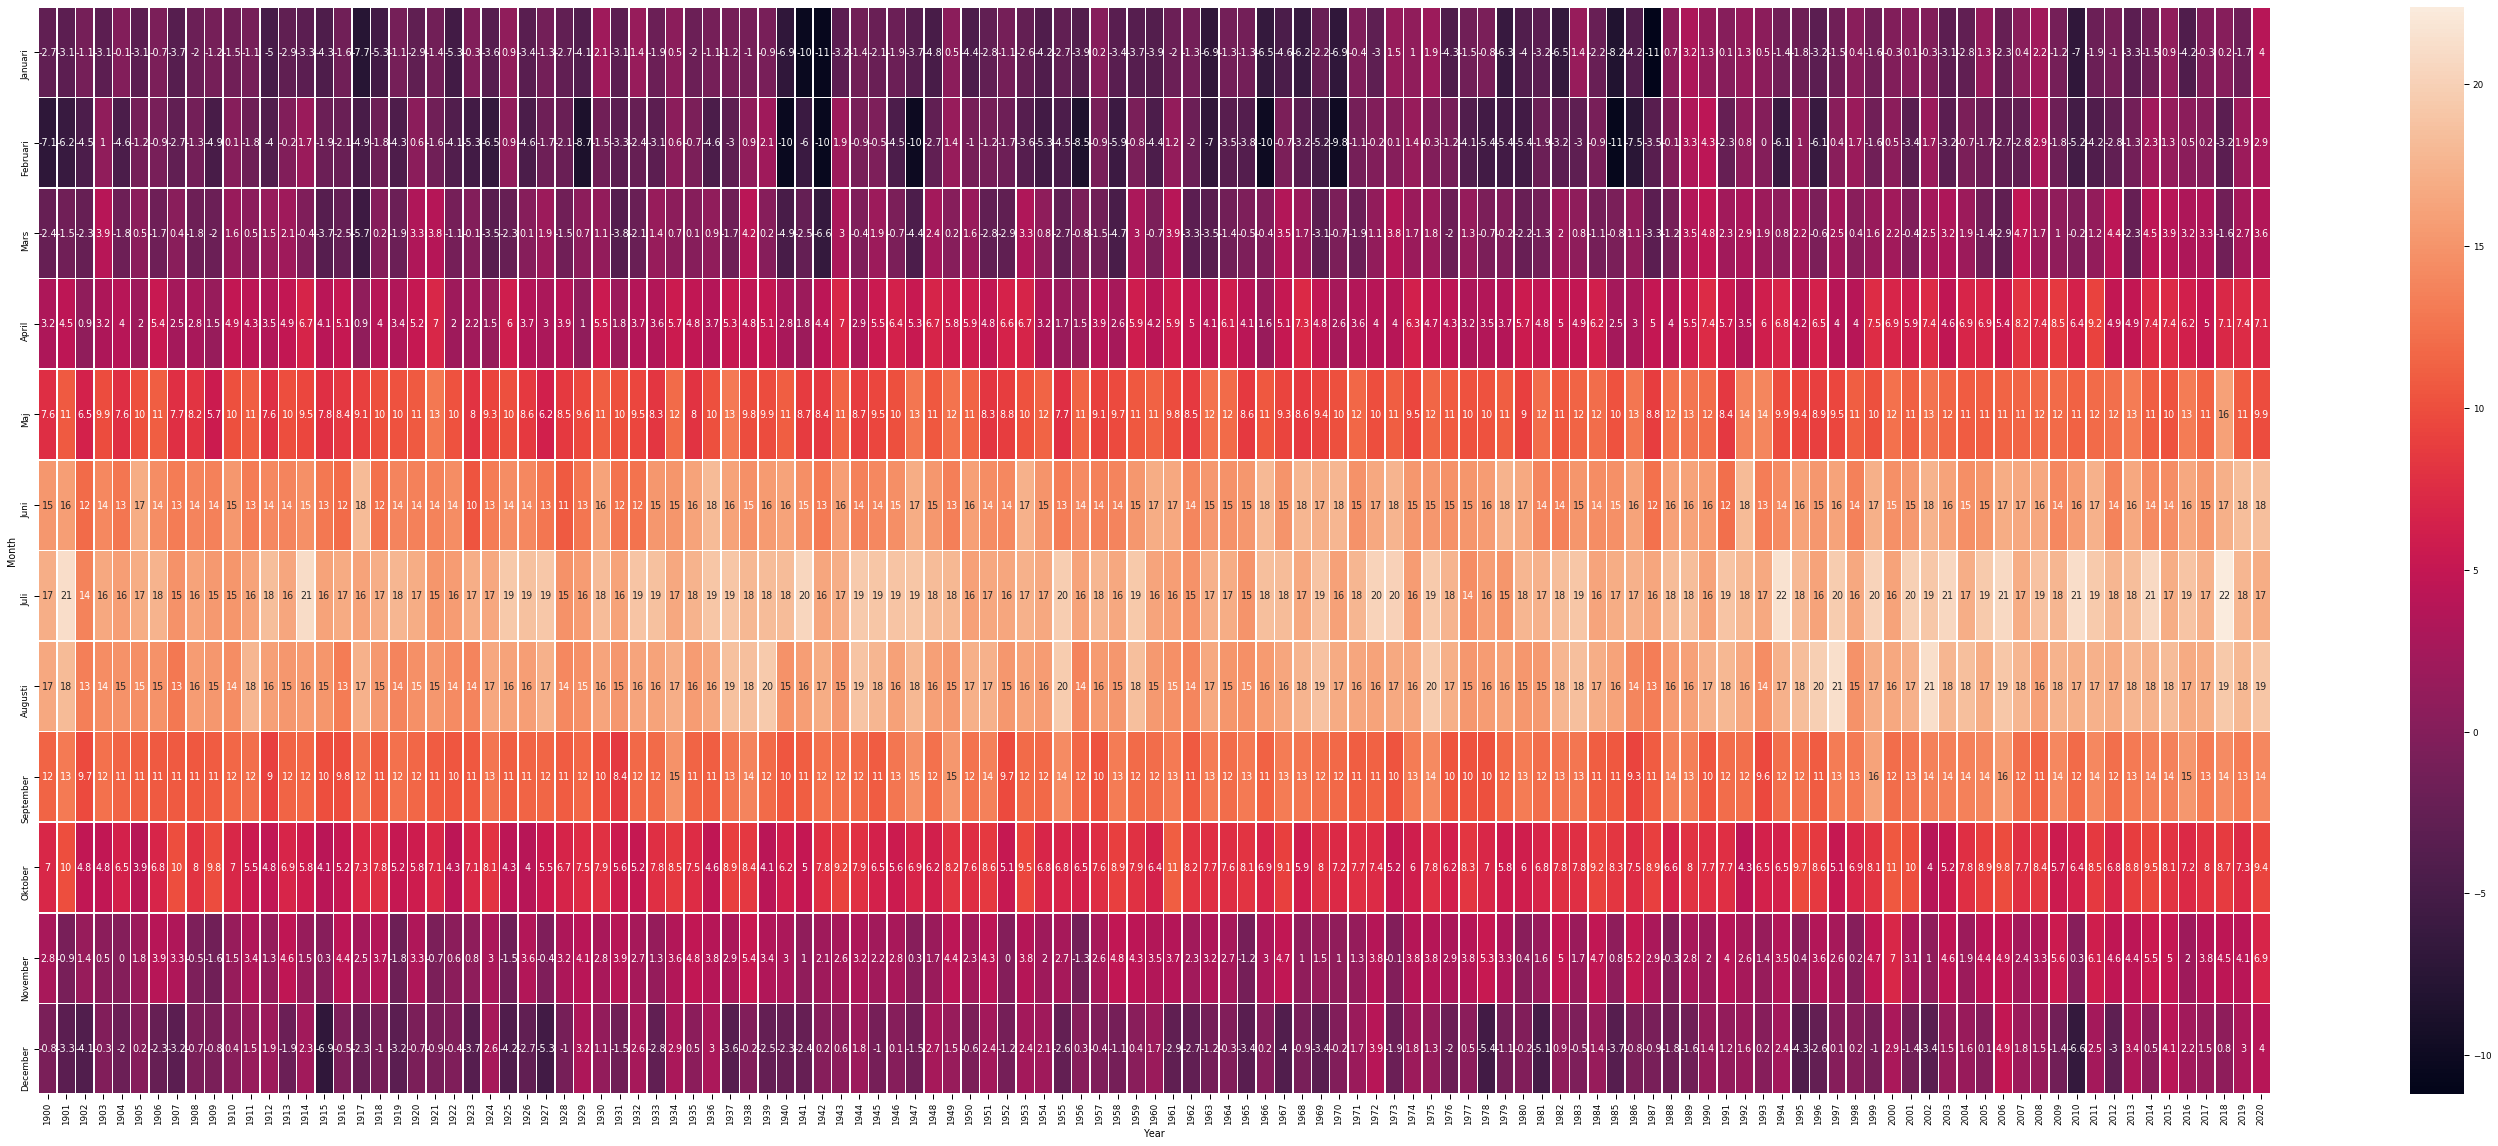

In [23]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 20))
sns.set_context('paper')

sns.heatmap(df_piv, annot=True, linewidths=.5, ax=ax);

plt.savefig('../3_Output/climate_heatmap.png', bbox_inches='tight')

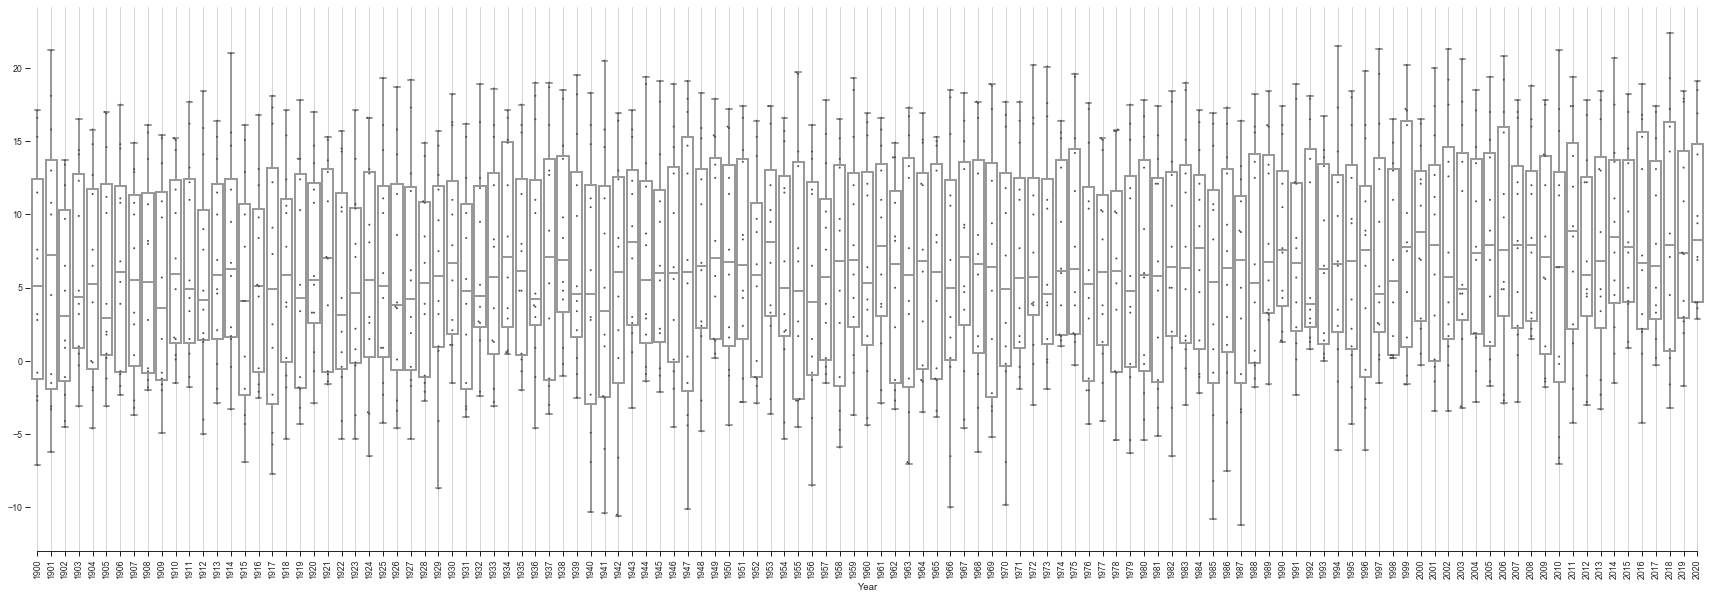

In [46]:
sns.set(style="ticks")
sns.set_context('paper')

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Year", y="Mean Temperature", data=df,
            whis=1.5, color="white", linewidth=2)

# Add in points to show each observation
sns.swarmplot(x="Year", y="Mean Temperature", data=df,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
plt.xticks(rotation=90);
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.savefig('../3_Output/climate_boxplots_year.png', bbox_inches='tight')

In [47]:
df["Decade"]=df["Year"]//10*10
df.sample(3)

,Name,Sign,Month,Date,Year,Mean Temperature,Decade
546,Månadsmedeltemperatur,TEMA.1.2.12,Maj,1962-12-31,1962,8.5,1960
417,Månadsmedeltemperatur,TEMA.1.2.12,April,1954-12-31,1954,3.2,1950
1399,Månadsmedeltemperatur,TEMA.1.2.12,December,1968-12-31,1968,-0.9,1960


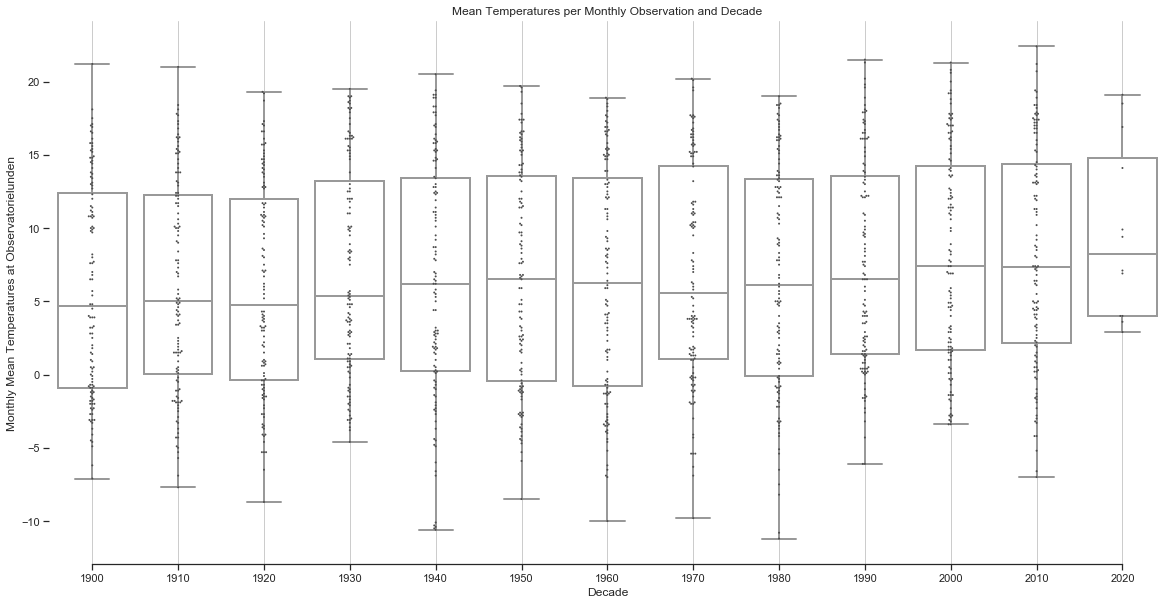

In [49]:
sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Decade", y="Mean Temperature", data=df,
            whis=1.5, color="white", linewidth=2)

# Add in points to show each observation
sns.swarmplot(x="Decade", y="Mean Temperature", data=df,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.title('Mean Temperatures per Monthly Observation and Decade');
plt.ylabel('Monthly Mean Temperatures at Observatorielunden');

plt.savefig('../3_Output/climate_boxplots_decade.png', bbox_inches='tight')

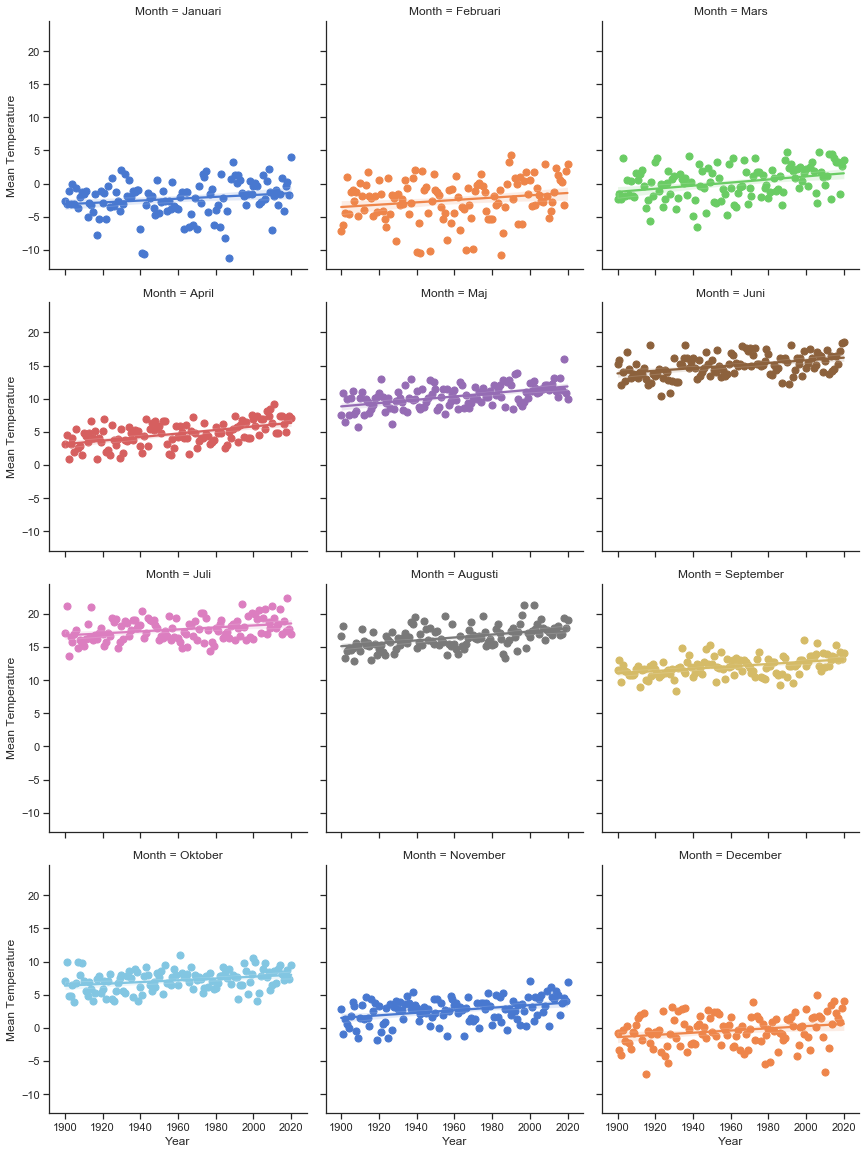

In [50]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Mean Temperature", col="Month", hue="Month", data=df,
           col_wrap=3, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

plt.savefig('../3_Output/climate_timeline_per_month.png', bbox_inches='tight')

In [36]:
# From https://climate.nasa.gov/vital-signs/global-temperature/

df_globe = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt",
                      skiprows=[0,1,2,4],
                      sep=r"\s+")

df_globe = df_globe.rename(columns={"No_Smoothing": "Mean Celsius Temperature (No Smoothing)",
                                   "Lowess(5)" : "Mean Celsius Temperature (Lowess Smoothing)"})

df_globe

,Year,Mean Celsius Temperature (No Smoothing),Mean Celsius Temperature (Lowess Smoothing)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.10,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.23
...,...,...,...
136,2016,1.01,0.88
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98


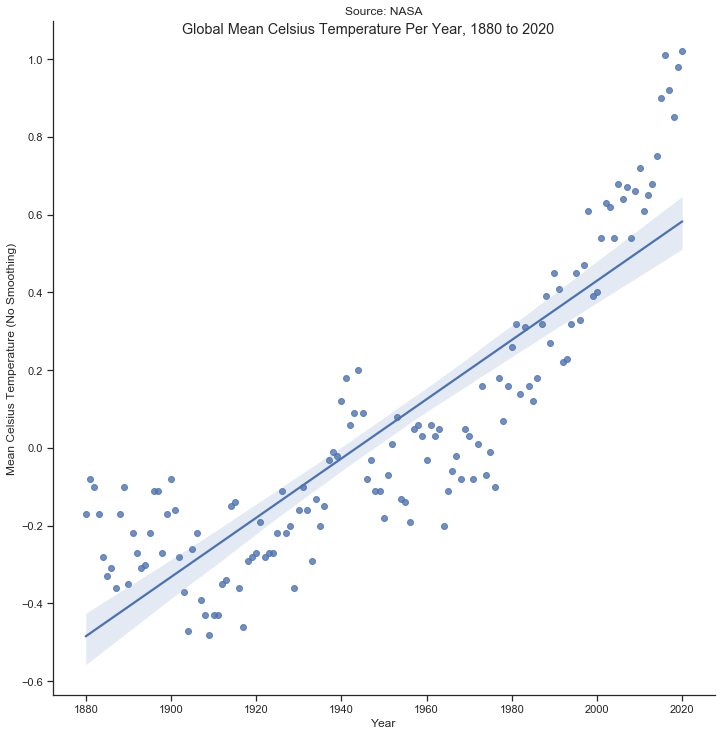

In [37]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
ax = sns.lmplot(x="Year", y="Mean Celsius Temperature (No Smoothing)", data=df_globe, height=10)

plt.title("Source: NASA")

plt.suptitle("Global Mean Celsius Temperature Per Year, 1880 to 2020")

plt.show()